<a href="https://colab.research.google.com/github/YinhaoHe/Python-AI-teaching/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Recognition

**Naive Bayes Classification** was an example of **generative classification**; here we will consider instead **discriminative classification**: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other. We will use **support vector machines** to look at a facial recognition problem

We will use the **Labeled Faces in the Wild** data set, which consists of several thousand collated photos of various public figures. 

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

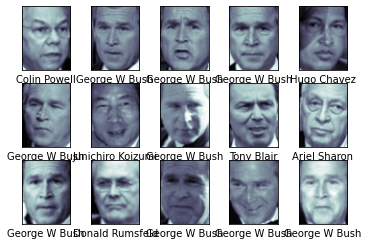

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap = 'bone')
  axi.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.

We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features.

In [4]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

Here we used **principal component analysis** to extract 150 fundamental components to feed into our **support vector machine classifier**.

We will split the data into a training and testing set.

In [5]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

To get the best fit model, we will use **cross validation**. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. 

Through each iteration, a different sub set of the data set is used to validate the the model created from the rest of the data set. The model with highest accuracy is the one used. 

We will use a **grid search cross-validation** to explore combinations of parameters.

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


Here we adjusted the following parameters to determine the best model.


*   C (which controls the margin hardness)
*   gamma (which controls the size of the radial basis function kernel)



With this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [7]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values.

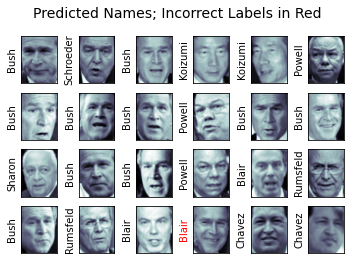

In [15]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
  axi.set(xticks = [], yticks = [])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                 color = 'black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14);

Out of this small sample, our optimal estimator mislabeled only a single face.